STOCK DATASET DATA EXPLORATORY ANALYSIS FROM YAHOO FINANCE

In [25]:
#Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
import pandas_datareader as data
from pandas_datareader import *
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [24]:
#Scraping Dataset from Yahoo Finance
START = '2012-12-12'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)



In [26]:
#Latest Stock Data
stock_dataset.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-13,171.039993,166.770004,167.389999,170.399994,70618900.0,170.399994
2022-04-14,171.270004,165.039993,170.619995,165.289993,75237500.0,165.289993
2022-04-18,166.600006,163.570007,163.919998,165.070007,69023900.0,165.070007
2022-04-19,167.820007,163.910004,165.020004,167.399994,67627500.0,167.399994
2022-04-20,168.860001,166.514999,168.759995,167.000000,23592842.0,167.000000


In [27]:
#Start of the dataset
stock_dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-12,19.571428,19.152500,19.563213,19.250000,4.871440e+08,16.629658
2012-12-13,19.201429,18.778570,18.969643,18.917500,6.252596e+08,16.342417
2012-12-14,18.504642,18.056429,18.383928,18.206785,1.009579e+09,15.728445
2012-12-17,18.571428,17.901072,18.176071,18.529642,7.576072e+08,16.007355
2012-12-18,19.103571,18.580357,18.750000,19.067858,6.256852e+08,16.472307


In [28]:
#Shape of Dataset
stock_dataset.shape

(2355, 6)

In [29]:
#Info Dataset
stock_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2355 entries, 2012-12-12 to 2022-04-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2355 non-null   float64
 1   Low        2355 non-null   float64
 2   Open       2355 non-null   float64
 3   Close      2355 non-null   float64
 4   Volume     2355 non-null   float64
 5   Adj Close  2355 non-null   float64
dtypes: float64(6)
memory usage: 128.8 KB


In [30]:
#Describe Dataset
stock_dataset.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2355.000000,2355.000000,2355.000000,2355.000000,2.355000e+03,2355.000000
mean,56.265163,55.090508,55.668518,55.702941,1.797154e+08,54.051232
std,44.474080,43.410068,43.936166,43.970717,1.305274e+08,44.578851
min,14.271429,13.753571,13.856071,13.947500,2.359284e+07,12.119164
25%,26.421250,25.941250,26.127501,26.176250,9.654400e+07,24.022685
50%,38.724998,38.222500,38.500000,38.482498,1.366164e+08,36.734837
75%,66.496250,65.248753,65.802498,65.918751,2.149918e+08,64.871265
max,182.940002,179.119995,182.630005,182.009995,1.460852e+09,181.778397


In [31]:
#Checking for Null Values
stock_dataset.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

<AxesSubplot:>

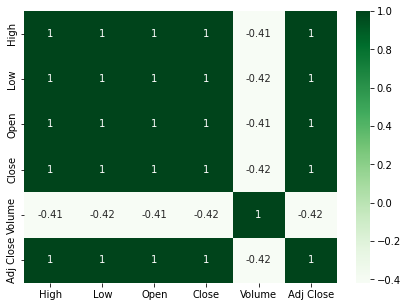

In [32]:
#Plottin Heat Map
plt.figure(figsize=(7,5))
sns.heatmap(stock_dataset.corr(),cmap='Greens',annot=True)

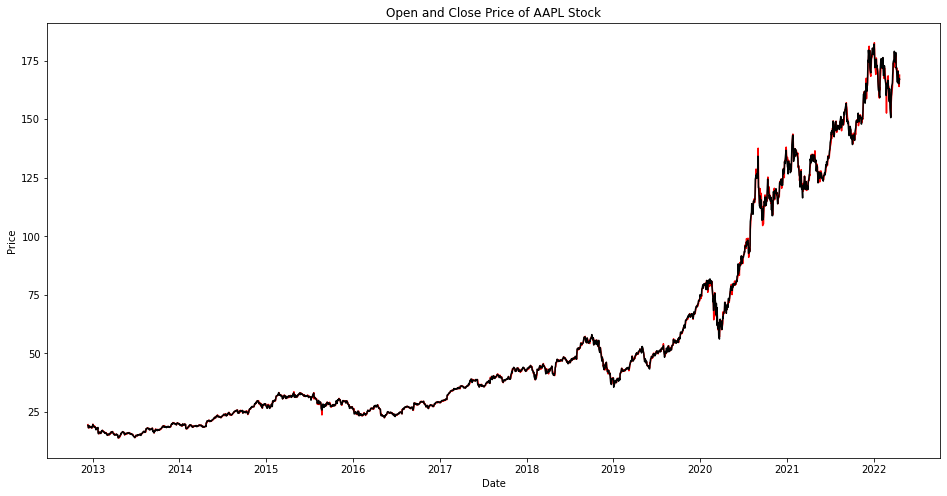

In [33]:
#Plotting Open and Closing Prices of AAPL Stock
plt.figure(figsize=(16,8))
plt.title("Open and Close Price of AAPL Stock")
plt.plot(stock_dataset['Open'], 'red')
plt.plot(stock_dataset['Close'], 'black')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

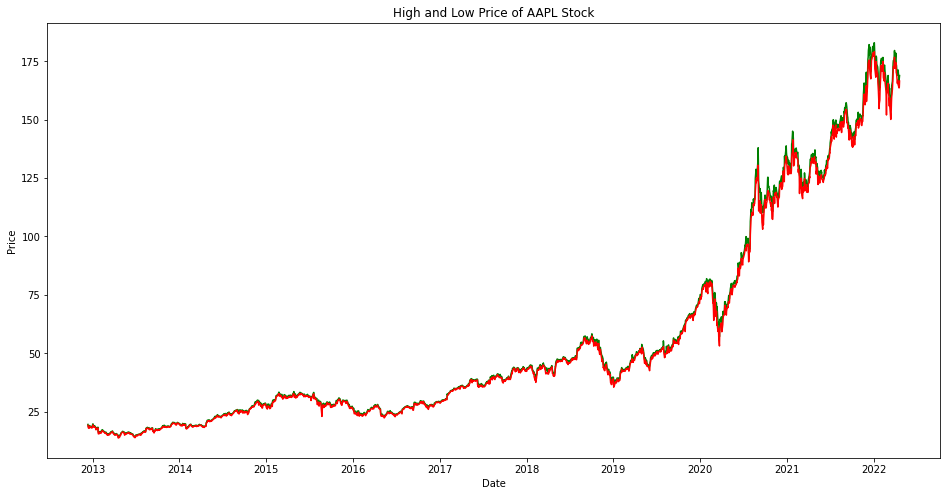

In [34]:
#Plotting High and Low Price Prices
plt.figure(figsize=(16,8))
plt.title("High and Low Price of AAPL Stock")
plt.plot(stock_dataset['High'], 'green')
plt.plot(stock_dataset['Low'], 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

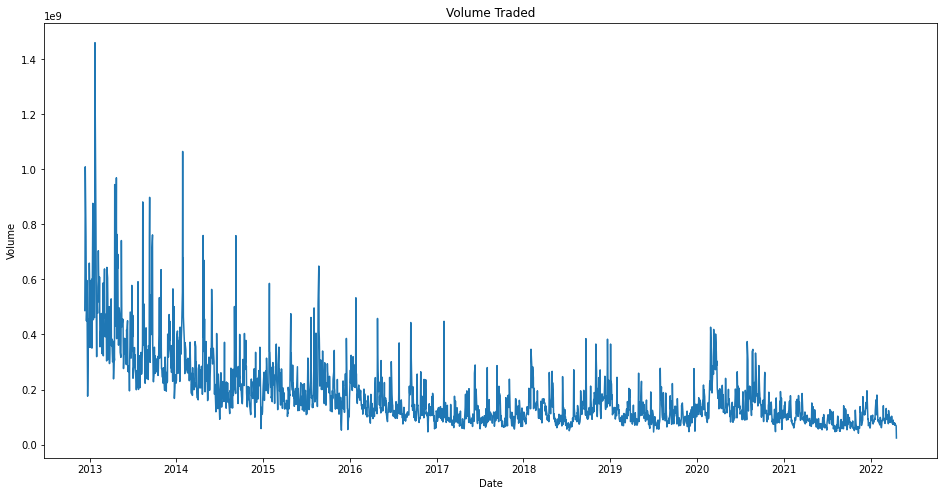

In [35]:
#Plotting Total Volume of HSBC being traded
plt.figure(figsize=(16, 8))
plt.title("Volume Traded")
plt.plot(stock_dataset['Volume'])
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()


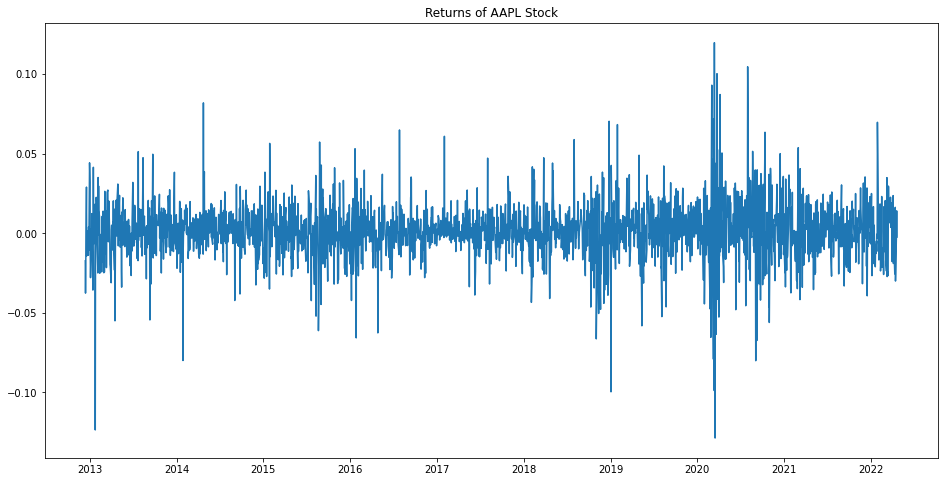

In [36]:
#Plotting Return on Average of AAPL Stock
stock_dataset['Daily Return'] = stock_dataset['Adj Close'].pct_change()
plt.figure(figsize=(16, 8))
plt.title("Returns of AAPL Stock")
plt.plot(stock_dataset['Daily Return'])
plt.show()


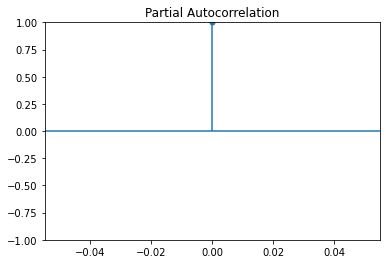

In [37]:
#Plotting PACF Graph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
prices = stock_dataset.Close
returns = stock_dataset['Adj Close'].pct_change()
plot_pacf(returns)
plt.show()

C:\Users\RAHUL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


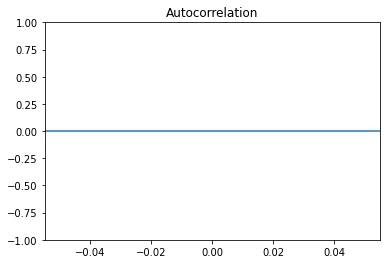

In [38]:
#Plotting ACF Graph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(returns)
plt.show()

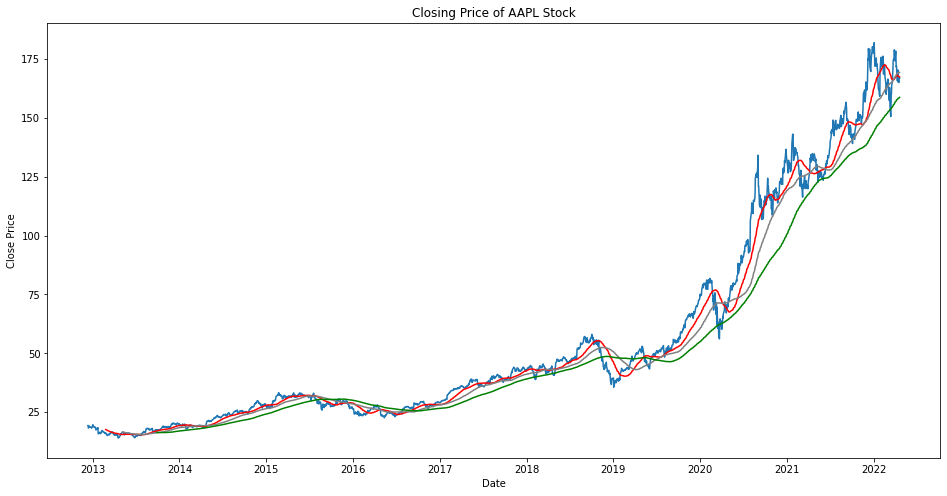

In [39]:
#Moving Average of 50 Days, 100 Days and 200 days
moving_average_50 = stock_dataset.Close.rolling(50).mean()
moving_average_100 = stock_dataset.Close.rolling(100).mean()
moving_average_200 = stock_dataset.Close.rolling(200).mean()


#Plotting 5/100/200 Days Moving Average
plt.figure(figsize=(16,8))
plt.title("Closing Price of AAPL Stock")
plt.plot(stock_dataset['Close'])
plt.plot(moving_average_50, 'red')
plt.plot(moving_average_100, 'grey')
plt.plot(moving_average_200, 'green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [40]:
#Looking at stock prices back 1 Year
START = '2021-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)
prices = stock_dataset.Close
print(prices)

Date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
                 ...    
2022-04-13    170.399994
2022-04-14    165.289993
2022-04-18    165.070007
2022-04-19    167.399994
2022-04-20    167.039993
Name: Close, Length: 327, dtype: float64


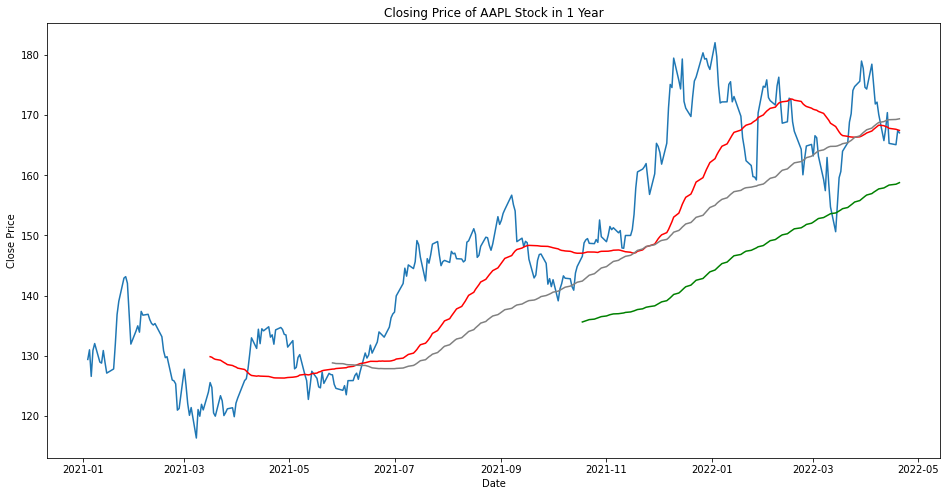

In [41]:
#Moving Average of 50 Days, 100 Days and 200 days

moving_average_50 = stock_dataset.Close.rolling(50).mean()
moving_average_100 = stock_dataset.Close.rolling(100).mean()
moving_average_200 = stock_dataset.Close.rolling(200).mean()


#Plotting 5/100/200 Days Moving Average
plt.figure(figsize=(16,8))
plt.title("Closing Price of AAPL Stock in 1 Year")
plt.plot(stock_dataset['Close'])
plt.plot(moving_average_50, 'red')
plt.plot(moving_average_100, 'grey')
plt.plot(moving_average_200, 'green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Text(0, 0.5, 'Returns')

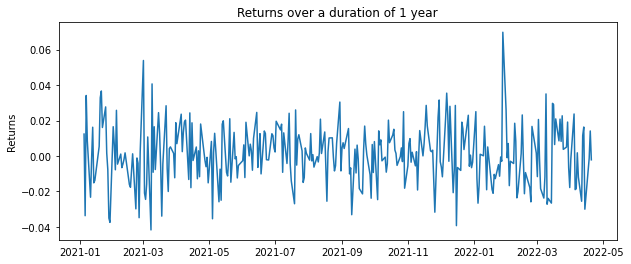

In [42]:
#Plotting Returns over a year
returns = prices.pct_change()
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.title("Returns over a duration of 1 year")
plt.ylabel('Returns')

In [43]:
#Scraping Dataset from Yahoo Finance
START = '2013-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)

In [44]:
#New Variables for Heat Map
stock_dataset['Open-High'] = stock_dataset['Open']-stock_dataset['High']
stock_dataset['Open-Low'] = stock_dataset['Open'] - stock_dataset['Low']
stock_dataset['Close-High'] = stock_dataset['Close']-stock_dataset['High']
stock_dataset['Close-Low'] = stock_dataset['Close'] - stock_dataset['Low']
stock_dataset['High-Low'] = stock_dataset['High'] - stock_dataset['Low']
stock_dataset['Open-Close'] = stock_dataset['Open'] - stock_dataset['Close']
stock_dataset.head()

,High,Low,Open,Close,Volume,Adj Close,Open-High,Open-Low,Close-High,Close-Low,High-Low,Open-Close
Date,,,,,,,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,16.939116,-0.042143,0.435356,-0.213215,0.264284,0.477499,0.171072
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.725302,-0.063929,0.245714,-0.270357,0.039286,0.309643,0.206429
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.259424,-0.059286,0.397858,-0.415358,0.041786,0.457144,0.356071
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.163782,-0.260714,0.242857,-0.192856,0.310715,0.503571,-0.067858
2013-01-08,18.996071,18.616072,18.900356,18.761070,458707200.0,16.207281,-0.095715,0.284285,-0.235001,0.144999,0.379999,0.139286


<AxesSubplot:>

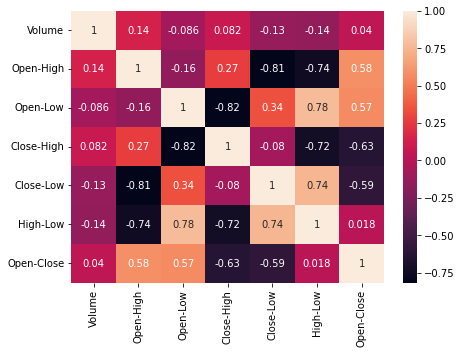

In [45]:
updated_dataset = stock_dataset.copy()
updated_dataset = updated_dataset.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(updated_dataset.corr(),annot=True)

In [46]:
#Scraping Dataset from Yahoo Finance
START = '2013-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)

In [47]:
#Relative Strength Index
def rsi(stock_dataset, window=14):
    close = stock_dataset['Close']
    
    # Price increase or decrease over previous day
    dif = close.diff()
    dif = dif[1:] 
    
    # pos_m identifies stock price going up
    # neg_m udentifies stock price going down
    pos_m, neg_m = dif.copy(), dif.copy()
    pos_m[pos_m < 0] = 0
    neg_m[neg_m > 0] = 0
    
    # Positive Rolling Mean Exponential
    prme = pos_m.ewm(span=window).mean()
    # Negative Rolling Mean Exponential
    nrme = neg_m.abs().ewm(span=window).mean()
    
    # Ratio of magnitude of up move to down move
    RSE = prme / nrme
    RSIE = 100.0 - (100.0 / (1.0 + RSE))
    stock_dataset['rsie'] = RSIE
    
    # Positive Rolling Mean Simple
    prms = pos_m.rolling(window).mean()
    # Negative Rolling Mean Simple
    nrms = neg_m.abs().rolling(window).mean()

    RSS = prms / nrms
    RSIS = 100.0 - (100.0 / (1.0 + RSS))
    
    stock_dataset['rsis'] = RSIS
    return stock_dataset

stock_dataset = rsi(stock_dataset)


In [48]:
stock_dataset.tail(14)

,High,Low,Open,Close,Volume,Adj Close,rsie,rsis
Date,,,,,,,,
2022-03-31,178.029999,174.399994,177.839996,174.610001,103049300.0,174.610001,62.355896,77.010863
2022-04-01,174.880005,171.940002,174.029999,174.309998,78699800.0,174.309998,61.212258,85.904801
2022-04-04,178.490005,174.440002,174.570007,178.440002,76468400.0,178.440002,69.962934,85.758022
2022-04-05,178.300003,174.419998,177.500000,175.059998,73401800.0,175.059998,57.675688,74.532171
2022-04-06,173.630005,170.130005,172.360001,171.830002,89058800.0,171.830002,48.318731,66.617252
2022-04-07,173.360001,169.850006,171.160004,172.139999,77594700.0,172.139999,49.230839,63.298562
2022-04-08,171.779999,169.199997,171.779999,170.089996,76515900.0,170.089996,43.387967,57.516739
2022-04-11,169.029999,165.500000,168.710007,165.750000,72246700.0,165.750000,33.636279,45.237347
2022-04-12,169.869995,166.639999,168.020004,167.660004,79265200.0,167.660004,40.434539,46.106867


In [49]:
import yfinance as yf

appl = yf.Ticker("AAPL")

# get stock info
# appl.info

# get historical market data
hist = appl.history(period="max")


hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.0,0.0
1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.0,0.0
1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.0,0.0
1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.0,0.0
1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0


In [50]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0
2022-04-19,165.020004,167.820007,163.910004,167.399994,67627500,0.0,0.0
2022-04-20,168.759995,168.860001,166.514999,167.009995,23614778,0.0,0.0


In [51]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.0,0.0
1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.0,0.0
1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.0,0.0
1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.0,0.0
1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.0,0.0


REGRESSION MODELS: LSTM, ARIMA & PROPHET.

CLASSIFICATION MODEL: LOGISTIC REGRESSION, DECISION TREE, RANDOM FOREST.